# Readme 
This notebook contains code to train and save a Doc2Vec model to be used for Clap Count Prediction and also to visualize the model outputs using TSNE (a dimensionality reduction method) 

In [1]:
import pandas as pd

import numpy as np
from numpy import save
from numpy import load

from scipy import spatial

import gensim
from nltk.corpus import stopwords
from collections import namedtuple
from gensim.models import doc2vec
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize


In [2]:
data_source = pd.read_excel('./ClapPredictionModels/Dataset.xlsx')
data_source.drop(data_source.columns.difference(['ID','title','popularity_level','raw_text']), 1, inplace=True)
#data_source=data_source.set_index('ID')

In [4]:
data_source.head(5)

,ID,title,popularity_level,raw_text
0,125,10 Common Software Architectural Patterns in a...,"1. >10,000 Claps",10 Common Software Architectural Patterns in a...
1,126,The 5 Clustering Algorithms Data Scientists Ne...,"1. >10,000 Claps",The 5 Clustering Algorithms Data Scientists Ne...
2,0,The best Mario Kart character according to dat...,"1. >10,000 Claps",The best Mario Kart character according to dat...
3,1,IQ is largely a pseudoscientific swindle | by ...,"1. >10,000 Claps",IQ is largely a pseudoscientific swindle | by ...
4,2,Learn Enough Docker to be Useful. Part 1: The ...,"1. >10,000 Claps",Learn Enough Docker to be Useful. Part 1: The ...


In [5]:
data = data_source["raw_text"]
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [ ]:
# #Code adapted from https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5
# Uncomment only if you are re-training the model

# max_epochs = 100
# vec_size = 300
# alpha = 0.025

# Doc2VecModel = Doc2Vec(vector_size=vec_size,
#                 alpha=alpha, 
#                 min_alpha=0.00025,
#                 min_count=1,
#                 dm =1)
  
# Doc2VecModel.build_vocab(tagged_data)

In [ ]:
# Uncomment only if you are re-training the model

# for epoch in range(max_epochs):
#     print('iteration {0}'.format(epoch))
#     Doc2VecModel.train(tagged_data,
#                 total_examples=Doc2VecModel.corpus_count,
#                 epochs=Doc2VecModel.iter)
#     # decrease the learning rate
#     Doc2VecModel.alpha -= 0.0002
#     # fix the learning rate, no decay
#     Doc2VecModel.min_alpha = model.alpha
    
# Doc2VecModel.save("Doc2Vec.model")

In [6]:
Doc2VecModel= Doc2Vec.load("./ClapPredictionModels/Doc2Vec.model")

In [8]:
# #Examples of how to use doc embeddings

# #to encode doc_vec for new text
# test_data = word_tokenize("I love chatbots. This is interesting isnt it".lower())
# vec = Doc2VecModel.infer_vector(test_data)

# print("")
# # to find most similar doc using tags
# similar_doc = Doc2VecModel.docvecs.most_similar([vec])
# print(similar_doc)

# print("")
# #to find most similar doc using tags
# similar_doc = Doc2VecModel.docvecs.most_similar(178)
# print(similar_doc)

# print("")
# #to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
# print(Doc2VecModel.docvecs['1'])

In [9]:
# Function to extract details of Top similar articles within the dataset
def top_similar_articles(article_index_ref,no=3):
    similar_doc = Doc2VecModel.docvecs.most_similar(article_index_ref)
    print("Top Matches For",data_source['title'][article_index_ref])
    print("")
    for i in range(no):
        print("Top #",i+1," with Similarity",round(similar_doc[i][1],2)*100,"% : ",data_source['title'][int(similar_doc[i][0])])
        print("")
    

In [10]:
top_similar_articles(195,no=5)

Top Matches For Building An (Amateur) Machine Learning Web App & What I Learnt | by Zhijing Eu | Analytics Vidhya | Aug, 2020 | Medium

Top # 1  with Similarity 42.0 % :  Building A Decision Support Tool For Capital Budgeting With Python Pulp | by Zhijing Eu | Analytics Vidhya | Sep, 2020 | Medium

Top # 2  with Similarity 41.0 % :  Building & Publishing A MS PowerBI COVID-19 Analytics Dashboard Online | by Zhijing Eu | Analytics Vidhya | Aug, 2020 | Medium

Top # 3  with Similarity 38.0 % :  Building A Whatsapp Chatbot With Python ChatterBot + Flask+ Ngrok+Twilio | by Zhijing Eu | Analytics Vidhya | Jul, 2020 | Medium

Top # 4  with Similarity 36.0 % :  Top 8 “No-Code” Machine Learning Platforms You Should Use In 2020 | by Anupam Chugh | Sep, 2020 | Towards Data Science

Top # 5  with Similarity 35.0 % :  How I Eat For Free in NYC Using Python, Automation, Artificial Intelligence, and Instagram | by Chris Buetti | Medium



In [11]:
#Extract Average Word Vector By Category No Of Claps
# Index In Ref Dataset, Rating, No Of Claps
# 0:21 , VH, >10000 claps
# 22:36 , H, 5000-10000 claps
# 37:65 , M, 1000-5000 claps
# 66:147 , L, 100-1000 claps
# 147-199 ,VL, <100 claps    

v=[]
for i in range(0,22): # Example for all articles with > 10,000 Claps
    vec=Doc2VecModel.docvecs[i]
    v.append(vec)

Clap_Vector=np.average(v, axis=0)
Clap_Vector


save('VH_Claps_Vector.npy', Clap_Vector)

In [12]:
#Building a 5x5 "Similarity" Matrix Between Average Word Vec By No Of Claps Category 
VH_Vec=load('./ClapPredictionModels/VH_Claps_Vector.npy')
H_Vec=load('./ClapPredictionModels/H_Claps_Vector.npy')
M_Vec=load('./ClapPredictionModels/M_Claps_Vector.npy')
L_Vec=load('./ClapPredictionModels/L_Claps_Vector.npy')
VL_Vec=load('./ClapPredictionModels/VL_Claps_Vector.npy')
Vec_List=[VH_Vec,H_Vec,M_Vec,L_Vec,VL_Vec]
similarity_matrix_VH_To_VL = [[(1-spatial.distance.cosine(x, y)) for x in Vec_List] for y in Vec_List]
similarity_matrix_VH_To_VL=np.round(similarity_matrix_VH_To_VL,3)
similarity_matrix_VH_To_VL     

array([[1.   , 0.845, 0.847, 0.886, 0.875],
       [0.845, 1.   , 0.842, 0.874, 0.865],
       [0.847, 0.842, 1.   , 0.922, 0.896],
       [0.886, 0.874, 0.922, 1.   , 0.93 ],
       [0.875, 0.865, 0.896, 0.93 , 1.   ]])

In [13]:
#Building a 3x3 "Similarity" Matrix Between Average Word Vec By No Of Claps Category 
MoreThan5k_Vec=load('./ClapPredictionModels/More_Than_5k_Claps_Vector.npy')
Between500to5k_Vec=load('./ClapPredictionModels/500-5k_Claps_Vector.npy')
LessThan500_Vec=load('./ClapPredictionModels/Less_Than_500_Claps_Vector.npy')
Vec_List2=[MoreThan5k_Vec,Between500to5k_Vec,LessThan500_Vec]
similarity_matrix_H_To_L= [[(1-spatial.distance.cosine(x, y)) for x in Vec_List2] for y in Vec_List2]
similarity_matrix_H_To_L=np.round(similarity_matrix_H_To_L,3)
similarity_matrix_H_To_L

array([[1.   , 0.911, 0.922],
       [0.911, 1.   , 0.95 ],
       [0.922, 0.95 , 1.   ]])

In [14]:
accuracy_table=[]
for i in range(200): # Example for all articles with > 10,000 Claps
    vec=Doc2VecModel.docvecs[i]
    sim_VH=(1-spatial.distance.cosine(VH_Vec,vec))
    sim_H=(1-spatial.distance.cosine(H_Vec,vec))
    sim_M=(1-spatial.distance.cosine(M_Vec,vec))
    sim_L=(1-spatial.distance.cosine(L_Vec,vec))
    sim_VL=(1-spatial.distance.cosine(VL_Vec,vec))             
    if (sim_VH > sim_H) and (sim_VH > sim_M) and (sim_VH > sim_L) and (sim_VH > sim_VL) :
        Predicted="1. >10,000 Claps"
    elif (sim_H > sim_VH) and (sim_H > sim_M) and (sim_H > sim_L) and (sim_H > sim_VL) :
        Predicted="2. 5,000-10,000 Claps"
    elif (sim_M > sim_VH) and (sim_M > sim_H) and (sim_M > sim_L) and (sim_M > sim_VL) :
        Predicted="3. 1,000-5,000 Claps"
    elif (sim_L > sim_VH) and (sim_L > sim_H) and (sim_L > sim_M) and (sim_L > sim_VL) :
        Predicted="4. 100-1,000 Claps"
    elif (sim_VL > sim_VH) and (sim_VL > sim_H) and (sim_VL > sim_M) and (sim_VL > sim_L) :
        Predicted="5. < 100 Claps"
    Actual=data_source['popularity_level'][i]
    accuracy_table.append([i,sim_VH,sim_H,sim_M,sim_L,sim_VL,Predicted,Actual])
                

In [15]:
accuracy_table = pd.DataFrame(accuracy_table)
accuracy_table.columns=["ID","VH","H","M","L","VL","Predicted","Actual"]

In [16]:
accuracy_table["Match"]=accuracy_table.apply(lambda x : True if x['Predicted'] == x['Actual'] else False , axis=1)

In [17]:
#To view how the dataframe looks
accuracy_table[55:67]

,ID,VH,H,M,L,VL,Predicted,Actual,Match
55,55,0.483655,0.408591,0.532548,0.539582,0.473495,"4. 100-1,000 Claps","3.1,000-5,000 Claps",False
56,56,0.451561,0.405376,0.516081,0.478806,0.433556,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
57,57,0.467660,0.469818,0.523060,0.459397,0.459993,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
58,58,0.502466,0.427626,0.541177,0.497819,0.517918,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
59,59,0.456815,0.555105,0.529772,0.504654,0.482307,"2. 5,000-10,000 Claps","3.1,000-5,000 Claps",False
60,60,0.417521,0.364485,0.464030,0.402036,0.419191,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
61,61,0.421850,0.418311,0.524458,0.491556,0.452698,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
62,62,0.393945,0.408323,0.513878,0.460163,0.449075,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
63,63,0.468069,0.469815,0.530657,0.480686,0.496636,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False
64,64,0.371074,0.388214,0.515310,0.456073,0.462893,"3. 1,000-5,000 Claps","3.1,000-5,000 Claps",False


<AxesSubplot:>

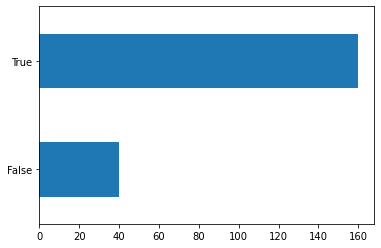

In [19]:
accuracy_table['Match'].value_counts().sort_values().plot(kind = 'barh')

When tested against "average" vectors by Clap Count Category , 80% of the 200 articles were correctly predicted

In [20]:
#i.e 160/(160+40)=80% Accuracy ?
accuracy_of_doc2vec=100*accuracy_table['Match'].value_counts()[1]/(accuracy_table['Match'].value_counts()[0]+accuracy_table['Match'].value_counts()[1])
accuracy_of_doc2vec

80.0

In [21]:
#Visualising the Doc2Vec in 2D using TSNE

ListOfLargeVectors=[]
for i in range(200):
    ListOfLargeVectors.append(Doc2VecModel.docvecs[i])

In [22]:
LabelForVectors=data_source["popularity_level"].tolist()

In [23]:
from sklearn.manifold import TSNE 
tsne_model = TSNE(n_components=2, random_state=0)
tsne_data = tsne_model.fit_transform(ListOfLargeVectors)
tsne_data = np.vstack((tsne_data.T, LabelForVectors)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "popularity_level"))

In [24]:
tsne_df['Dim_1'] = pd.to_numeric(tsne_df['Dim_1'],errors='coerce')
tsne_df['Dim_2'] = pd.to_numeric(tsne_df['Dim_2'],errors='coerce')

(-75.0, 100.0)

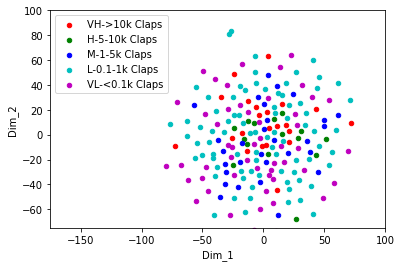

In [25]:
ax1 = tsne_df[tsne_df["popularity_level"]=="1. >10,000 Claps"].plot(kind='scatter', x='Dim_1', y='Dim_2', color='r',label="VH->10k Claps")    
ax2 = tsne_df[tsne_df["popularity_level"]=="2. 5,000-10,000 Claps"].plot(kind='scatter', x='Dim_1', y='Dim_2', color='g',label="H-5-10k Claps", ax=ax1)    
ax3 = tsne_df[tsne_df["popularity_level"]=="3.1,000-5,000 Claps"].plot(kind='scatter', x='Dim_1', y='Dim_2', color='b',label="M-1-5k Claps", ax=ax1)
ax4 = tsne_df[tsne_df["popularity_level"]=="4. 100-1,000 Claps"].plot(kind='scatter', x='Dim_1', y='Dim_2', color='c',label="L-0.1-1k Claps", ax=ax1) 
ax5 = tsne_df[tsne_df["popularity_level"]=="5. < 100 Claps"].plot(kind='scatter', x='Dim_1', y='Dim_2', color='m',label="VL-<0.1k Claps", ax=ax1)
ax1.set_xlim([-175,100])
ax1.set_ylim([-75,100])

When the 300 dimension word vector is "projected" down to 2 dimensions, there is a weak pattern where the higher clap articles tend to cluster towards the centre (purple and blue dots tend to be further out)